## This Notebook is into 3 parts:
- 1. Data Preparation and Modeling
- 2. Data Visualization
- 3. Model Building

# 1. Data Preparation and Modeling

In [234]:
# Import Packages
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import pickle
%matplotlib inline

In [235]:
# Import Data Frame 
data = pd.read_csv("data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [236]:
# Data Preparation

#Select only important columns
features = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']

#Make the data only the important columns
data = data[features]

# Rename the columns  
data = data.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

In [237]:
# Data Modeling

accidents = data[data['Year'] < 2021] # Drop the records which come after 2020

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=False)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index = years
)

accidents

,Category,Accident_Type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


# 2. Data Visualization

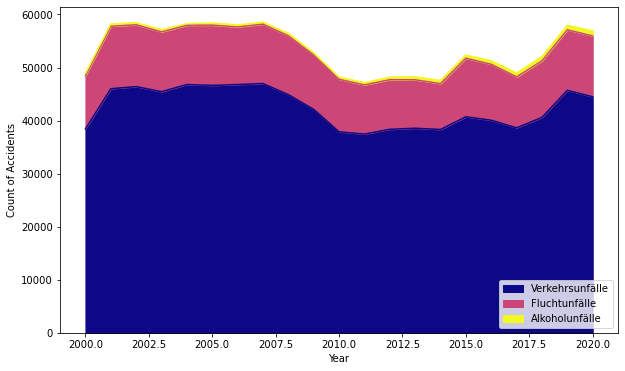

In [244]:
# Data Visualization

accidents_category.plot(kind = 'area', colormap = 'plasma',)
plt.gcf().set_size_inches(10,6)
plt.xlabel("Year")
plt.ylabel("Count of Accidents")
plt.legend(bbox_to_anchor=(1,0), loc="lower right")
plt.show()

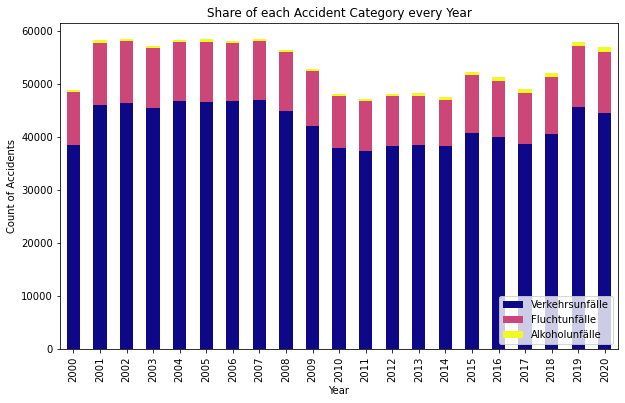

In [245]:
accidents_category.plot(kind = 'bar', colormap = 'plasma', stacked = True)
plt.gcf().set_size_inches(10,6)
plt.title('Share of each Accident Category every Year')
plt.xlabel("Year")
plt.ylabel("Count of Accidents")
plt.legend(bbox_to_anchor=(1,0), loc="lower right")
plt.show()

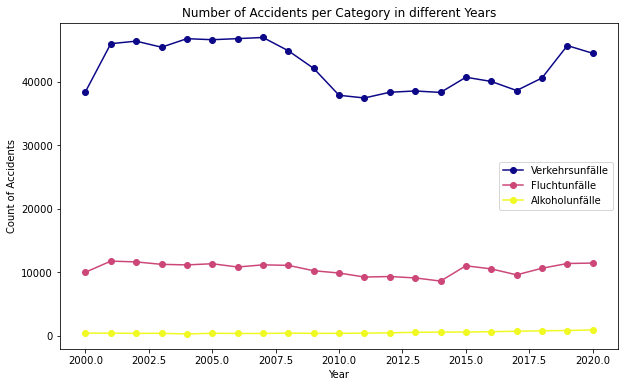

In [246]:
accidents_category.plot(kind = "line", colormap = 'plasma', marker = 'o')
plt.gcf().set_size_inches(10,6)
plt.title('Number of Accidents per Category in different Years')
plt.xlabel("Year")
plt.ylabel("Count of Accidents")
plt.show()

> From all the above plots it can be seen that most of the accidents in Munich are caused by Road accidents ("Verkehrsunfälle") followed by Escape accidents ("Fluchtunfälle") and least by Drink-and-Drive ("Alkoholunfälle") 

> The Years are in floating point to indicate all the continous scale of values. 

In [250]:
# Remove null values
data = data.dropna()

# Remove the 'Summe' from Month column 
data = data[data['Month'] != 'Summe']

data

#df.to_csv('data.csv', header=False, index=False)

,Category,Accident_Type,Year,Month,Value
13,Alkoholunfälle,insgesamt,2021,202101,16.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0
17,Alkoholunfälle,insgesamt,2021,202105,24.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


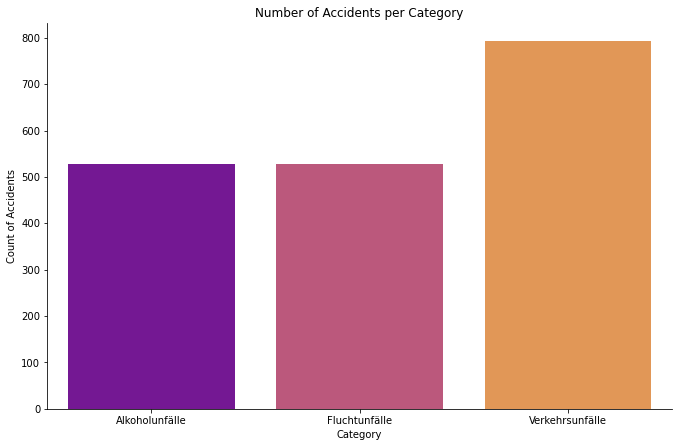

In [195]:
# Plot Number of accidents per category

plot = sns.catplot(x="Category", kind="count", data=data, palette="plasma")
plt.title('Number of Accidents per Category')
plt.gcf().set_size_inches(10,6)
plt.xlabel("Category")
plt.ylabel("Count of Accidents")
plt.show()

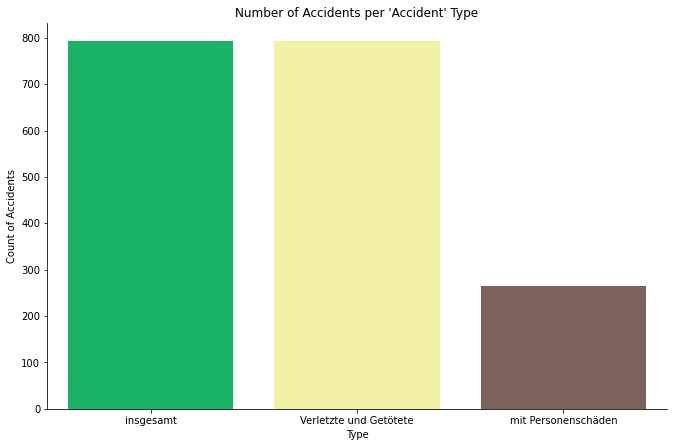

In [196]:
# Plot Number of accidents per Accident Type

plot = sns.catplot(x="Accident_Type", kind="count", data=data, palette="terrain")
plt.title("Number of Accidents per 'Accident' Type")
plt.gcf().set_size_inches(10,6)
plt.xlabel("Type")
plt.ylabel("Count of Accidents")
plt.show()

# 3. Model Building

In [189]:
# Get only month numbers in Month column
data['Month'] = data['Month'].str[-2:]

# Get only Year numbers in Month column
data['Month'] = data['Month'].str[-2:]

# Specify the features
features = ['Year','Month']
X = data[features]

# Specify the prediction value
Y = data.Value

# Specify train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [190]:
scaler = MinMaxScaler()

# Fit the model 
scaler.fit(data[features])
scaler.transform(data[features])

# Train the model and make the prediction
trainData = pd.concat(
  [
    data['Value'].reset_index(drop = True),
    pd.DataFrame(
    scaler.transform(data[features]), 
    columns = features)
  ],
  axis=1
)

In [191]:
X=trainData[features]
Y=trainData['Value']

regressor = LinearRegression()

# Fit the model
regressor.fit(X, Y)

LinearRegression()

In [192]:
# Save the model
pickle.dump(regressor, open('model.pkl','wb'))